<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Computer-vision--Tensorflow/blob/main/computer_vision_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#gat the data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

--2025-01-14 00:44:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.3MB/s    in 6.1s    

2025-01-14 00:44:07 (17.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile
zip_data=zipfile.ZipFile("pizza_steak.zip")
zip_data.extractall()
zip_data.close(
)

#inspecting data (becoming one with it)

In [ ]:
ls pizza_steak

test/  train/


In [ ]:
! ls pizza_steak/train/pizza/

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

#inspecting directory to find the number of files

In [ ]:
# lets walk through pizza_steak directory and count the number of files
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directory and {len(filenames)} files in {dirpath} directory ")

there are 2 directory and 0 files in pizza_steak directory 
there are 2 directory and 0 files in pizza_steak/test directory 
there are 0 directory and 250 files in pizza_steak/test/pizza directory 
there are 0 directory and 250 files in pizza_steak/test/steak directory 
there are 2 directory and 0 files in pizza_steak/train directory 
there are 0 directory and 750 files in pizza_steak/train/pizza directory 
there are 0 directory and 750 files in pizza_steak/train/steak directory 


In [ ]:
# another way to find the number of file in a directory
num_pizza_images_train=len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_pizza_images_test=len(os.listdir("pizza_steak/test/pizza"))
num_steak_images_test=len(os.listdir("pizza_steak/test/steak"))
num_pizza_images_train,num_steak_images_train,num_pizza_images_test,num_steak_images_test

(750, 750, 250, 250)

In [ ]:
os.listdir("pizza_steak/train")

['pizza', 'steak']

In [ ]:
# get the class name programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
[item.name for item in data_dir.glob("*")]

['pizza', 'steak']

In [ ]:
# lets visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup target directory
  target_folder=target_dir+target_class
  # print(target_folder)
  # get the ramdom image path
  random_image=random.sample(os.listdir(target_folder),1)
  # print(f"random image= {random_image}")
  # read image and plot
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  # print(f"image shape: {img.shape}")
  return img


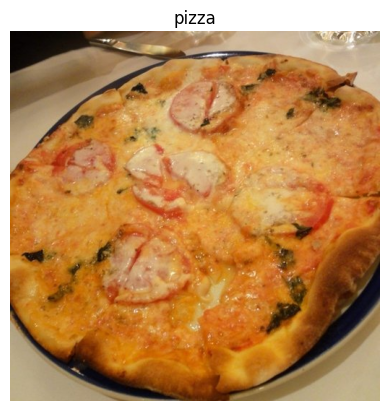

In [ ]:
# view image from training dataset
image=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

array([[[  7,   3,   0],
        [  7,   3,   0],
        [  7,   3,   0],
        ...,
        [167, 152, 123],
        [167, 153, 124],
        [166, 153, 121]],

       [[  6,   2,   0],
        [  7,   3,   0],
        [  7,   3,   0],
        ...,
        [171, 156, 127],
        [164, 151, 119],
        [166, 153, 121]],

       [[  6,   2,   0],
        [  6,   2,   0],
        [  7,   3,   0],
        ...,
        [165, 150, 121],
        [154, 141, 109],
        [159, 146, 114]],

       ...,

       [[189, 174, 133],
        [188, 173, 132],
        [187, 172, 131],
        ...,
        [191, 178, 136],
        [191, 178, 134],
        [193, 180, 136]],

       [[189, 174, 133],
        [188, 173, 132],
        [187, 172, 131],
        ...,
        [190, 177, 135],
        [190, 177, 133],
        [192, 179, 135]],

       [[190, 175, 134],
        [189, 174, 133],
        [188, 173, 132],
        ...,
        [190, 177, 135],
        [190, 177, 133],
        [191, 178, 134]]], dtype=uint8)
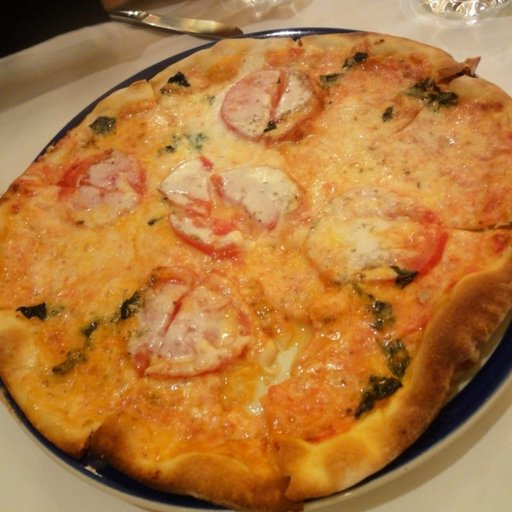

In [ ]:
image

In [ ]:
import tensorflow as tf
tf.constant(image)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  7,   3,   0],
        [  7,   3,   0],
        [  7,   3,   0],
        ...,
        [167, 152, 123],
        [167, 153, 124],
        [166, 153, 121]],

       [[  6,   2,   0],
        [  7,   3,   0],
        [  7,   3,   0],
        ...,
        [171, 156, 127],
        [164, 151, 119],
        [166, 153, 121]],

       [[  6,   2,   0],
        [  6,   2,   0],
        [  7,   3,   0],
        ...,
        [165, 150, 121],
        [154, 141, 109],
        [159, 146, 114]],

       ...,

       [[189, 174, 133],
        [188, 173, 132],
        [187, 172, 131],
        ...,
        [191, 178, 136],
        [191, 178, 134],
        [193, 180, 136]],

       [[189, 174, 133],
        [188, 173, 132],
        [187, 172, 131],
        ...,
        [190, 177, 135],
        [190, 177, 133],
        [192, 179, 135]],

       [[190, 175, 134],
        [189, 174, 133],
        [188, 173, 132],
        ...,
        [190, 177, 13

In [ ]:
image=image/225
image

array([[[0.03111111, 0.01333333, 0.        ],
        [0.03111111, 0.01333333, 0.        ],
        [0.03111111, 0.01333333, 0.        ],
        ...,
        [0.74222222, 0.67555556, 0.54666667],
        [0.74222222, 0.68      , 0.55111111],
        [0.73777778, 0.68      , 0.53777778]],

       [[0.02666667, 0.00888889, 0.        ],
        [0.03111111, 0.01333333, 0.        ],
        [0.03111111, 0.01333333, 0.        ],
        ...,
        [0.76      , 0.69333333, 0.56444444],
        [0.72888889, 0.67111111, 0.52888889],
        [0.73777778, 0.68      , 0.53777778]],

       [[0.02666667, 0.00888889, 0.        ],
        [0.02666667, 0.00888889, 0.        ],
        [0.03111111, 0.01333333, 0.        ],
        ...,
        [0.73333333, 0.66666667, 0.53777778],
        [0.68444444, 0.62666667, 0.48444444],
        [0.70666667, 0.64888889, 0.50666667]],

       ...,

       [[0.84      , 0.77333333, 0.59111111],
        [0.83555556, 0.76888889, 0.58666667],
        [0.83111111, 0

# building CNN

* load data
* preprocess data
* build model
* compile
* Fit

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
#preprocess data. get all the data between 0 and 1

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# setup path for our data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# import data from directories and turn into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
                                             )

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
                                             )

# build our CNN model. same as CNN explainer
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=(1,1),
                           activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_history=model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.5449 - loss: 0.7797 - val_accuracy: 0.7400 - val_loss: 0.5118
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7876 - loss: 0.4590 - val_accuracy: 0.8460 - val_loss: 0.3627
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.8259 - loss: 0.4006 - val_accuracy: 0.8660 - val_loss: 0.3356


In [ ]:
len(train_data)  # we have distributed our data into 47 batch with each of batch size of 32.

47

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot("accuracy")

ValueError: All arrays must be of the same length

In [ ]:
model_history.history

{'accuracy': [0.6306666731834412,
  0.0,
  0.7873333096504211,
  0.0,
  0.8213333487510681],
 'loss': [0.6764787435531616,
  0.0,
  0.4580824375152588,
  0.0,
  0.40366512537002563],
 'val_accuracy': [0.7400000095367432, 0.8460000157356262, 0.8659999966621399],
 'val_loss': [0.5118327736854553, 0.36269813776016235, 0.3355509042739868]}

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
# set random seed
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="softmax")
])
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_2_history=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.4814 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5002 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.5178 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

even model 2 has more trainable parameters than model 1. it performs terible

In [ ]:
# set random seed
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="softmax")
])
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_3_history=model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.5144 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.4945 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.5068 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,189,305 (172.38 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,126,204 (114.92 MB)

## 1. become one with the data

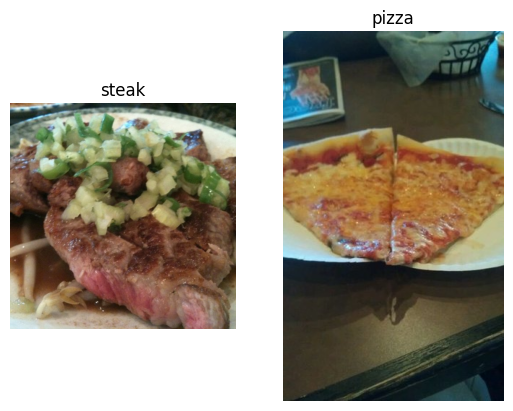

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_pic=view_random_image(target_dir="pizza_steak/train/",target_class="steak")
plt.subplot(1,2,2)
pizza_pic=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")


## 2. Preprocess the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
#preprocess data. get all the data between 0 and 1

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# setup path for our data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# import data from directories and turn into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
                                             )

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
                                             )



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get the sample of a train data batch
images,labels=next(train_data)
images.shape,labels.shape,len(images),len(labels)

((32, 224, 224, 3), (32,), 32, 32)

In [ ]:
len(train_data)

47

## create a CNN. a baseline network

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

In [ ]:
# create a CNN with this baseline
model_4=Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input. (higher= more complex model)
           kernel_size=3,activation="relu", # the size of the sliding window going across an input
           padding="valid", # when the padding is same; means the i/p size is same as o/p size. if valid, the output size is compressed
           strides=(1,1), # the size of the step the sliding window take across an input
           input_shape=(224,224,3)),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_4_history=model_4.fit(train_data,
                            epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.6035 - loss: 0.7240 - val_accuracy: 0.8100 - val_loss: 0.5026
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8367 - loss: 0.4185 - val_accuracy: 0.7940 - val_loss: 0.4240
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.9156 - loss: 0.2485 - val_accuracy: 0.8260 - val_loss: 0.3834
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9773 - loss: 0.0894 - val_accuracy: 0.8400 - val_loss: 0.3944
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9967 - loss: 0.0197 - val_accuracy: 0.8360 - va

## 5. eveluate model

In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8213 - loss: 0.6386


[0.5921789407730103, 0.8259999752044678]

In [ ]:
import pandas as pd
pd.DataFrame(model_4_history.history).plot(figsize=(10,7));

ValueError: All arrays must be of the same length

In [ ]:
model_4_history.history

{'accuracy': [0.6733333468437195,
  0.0,
  0.8339999914169312,
  0.0,
  0.9253333210945129,
  0.0,
  0.9806666374206543,
  0.0,
  0.9959999918937683,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0],
 'loss': [0.6285320520401001,
  0.0,
  0.4147506654262543,
  0.0,
  0.23081530630588531,
  0.0,
  0.08070874214172363,
  0.0,
  0.0172477625310421,
  0.0,
  0.0043748291209340096,
  0.0,
  0.0017813127487897873,
  0.0,
  0.0010024869116023183,
  0.0,
  0.0006382092833518982,
  0.0,
  0.0004780178132932633,
  0.0],
 'val_accuracy': [0.8100000023841858,
  0.7940000295639038,
  0.8259999752044678,
  0.8399999737739563,
  0.8360000252723694,
  0.8339999914169312,
  0.8299999833106995,
  0.8360000252723694,
  0.8320000171661377,
  0.8259999752044678],
 'val_loss': [0.502583384513855,
  0.4239673316478729,
  0.3834201693534851,
  0.3944232761859894,
  0.47329181432724,
  0.476605623960495,
  0.538197934627533,
  0.5604254007339478,
  0.5857772827148438,
  0.5921789407

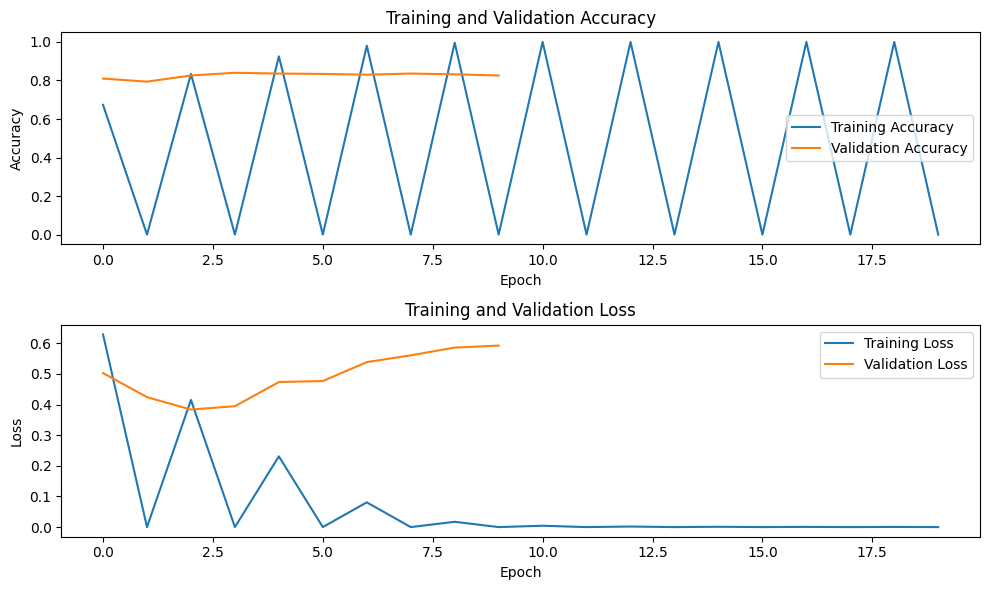

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the dictionary
accuracy = model_4_history.history['accuracy']
loss = model_4_history.history['loss']
val_accuracy = model_4_history.history['val_accuracy']
val_loss = model_4_history.history['val_loss']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot training and validation accuracy
axs[0].plot(accuracy, label='Training Accuracy')
axs[0].plot(val_accuracy, label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(loss, label='Training Loss')
axs[1].plot(val_loss, label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
## there is somethis wrong here bcz the accuracy is 0 after each epochs

# when the validation loss starts increasing, it's likely that the model is overfitting the training datets. it means: its learning the pattern in the training dataset too well that the model's capacity of generalize the unseen data is diminished

## 6. adjust the model parameters
Fitting the ML model comes into 3 steps
* create a baseline
* beat the baseline by overfitting a larger model
* reduce overfitting

ways to reduce overfitting

* increase the numbers of conv layer
* increase the nuber of filter
* add another dense layer to the output of flatten layer
* add regularization layer such as Maxpool2D

**NOTE** reducing overfitting is also known as **regularization**

In [ ]:
# another CNN

model_5=tf.keras.Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",padding="valid",strides=1,input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu",padding="valid",strides=1),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu",padding="valid",strides=1),
    Conv2D(10,3,activation="relu",padding="valid",strides=1),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_model_5=model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.5901 - loss: 0.6573 - val_accuracy: 0.8500 - val_loss: 0.3738
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.8028 - loss: 0.4366 - val_accuracy: 0.8660 - val_loss: 0.3639
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.8285 - loss: 0.3957 - val_accuracy: 0.8740 - val_loss: 0.3136


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

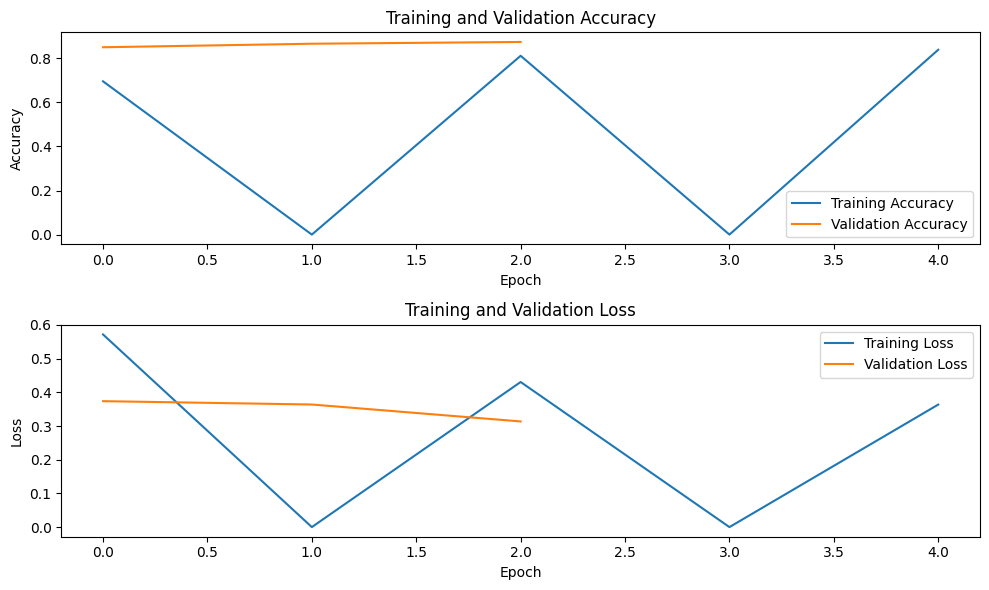

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the dictionary
accuracy = history_model_5.history['accuracy']
loss = history_model_5.history['loss']
val_accuracy = history_model_5.history['val_accuracy']
val_loss = history_model_5.history['val_loss']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot training and validation accuracy
axs[0].plot(accuracy, label='Training Accuracy')
axs[0].plot(val_accuracy, label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(loss, label='Training Loss')
axs[1].plot(val_loss, label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)


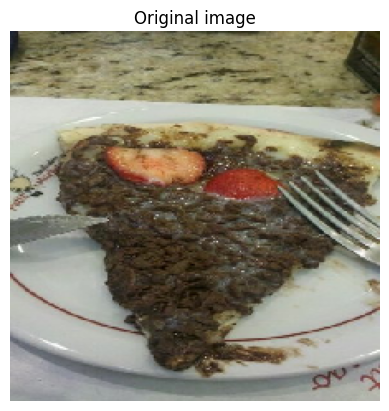

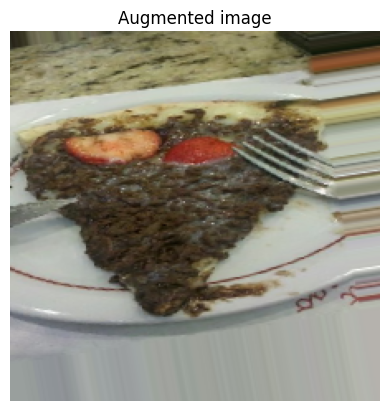

In [ ]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# another CNN
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation
model_6=tf.keras.Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",padding="valid",strides=1,input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu",padding="valid",strides=1),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu",padding="valid",strides=1),
    Conv2D(10,3,activation="relu",padding="valid",strides=1),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
model_6.history=model_6.fit(train_data_augmented,
                            epochs=5,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 422ms/step - accuracy: 0.3922 - loss: 0.7973 - val_accuracy: 0.5300 - val_loss: 0.6926
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.5242 - loss: 0.6922 - val_accuracy: 0.6600 - val_loss: 0.6546
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 374ms/step - accuracy: 0.6087 - loss: 0.6660 - val_accuracy: 0.6880 - val_loss: 0.5954


shuffle data this time and make a model same as before


In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                target_size=(224,224),
                                                                class_mode='binary',
                                                                shuffle=True,
                                                                batch_size=32,
                                                                )

Found 1500 images belonging to 2 classes.


In [ ]:
model_7=tf.keras.Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",padding="valid",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu",padding="valid"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu",padding="valid"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=(2,2),
              ),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
model_7.history=model_7.fit(train_data_augmented_shuffled,
                            epochs=5,
                            steps_per_epoch=len(train_data_augmented_shuffled),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 392ms/step - accuracy: 0.4809 - loss: 0.7314 - val_accuracy: 0.5160 - val_loss: 0.6552
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.5662 - loss: 0.6504 - val_accuracy: 0.7580 - val_loss: 0.4886
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - accuracy: 0.7181 - loss: 0.5629 - val_accuracy: 0.7820 - val_loss: 0.4721


**Note** when shuffling the training data, the model get exposed to all different kimd of data during training, thus enabling it learn features a wide range of images( in our case pizza and steak at the same time rathar than just pizza and than just stake). that's why the validation accuracy of model_7 is 0.85 whereas the validation accuracy of model_6 is 0.59

In [ ]:
# !wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak=mpimg.imread("03-steak.jpeg")

(-0.5, 3023.5, 4031.5, -0.5)

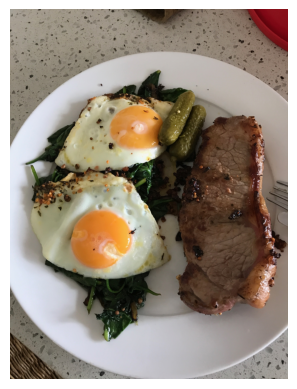

In [ ]:
plt.imshow(steak)
plt.axis('off')

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
model_7.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_6_1/Cast:0", shape=(32, 3024, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 3024, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 3024, 3), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
tf.expand_dims(steak,axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
model_7.predict(tf.expand_dims(steak,axis=0))

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 28090, but received input with shape (1, 7567650)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 4032, 3024, 3), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
#creating a function to read image and resize it

def load_image_and_prep(filename,img_shape=224):
  # read the image
  img=tf.io.read_file(filename)
  # decode the image into tensor
  img=tf.image.decode_image(img)
  # resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image
  img=img/255
  return img


In [ ]:
steak=load_image_and_prep("03-steak.jpeg")

In [ ]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))

Exception ignored in: <function _xla_gc_callback at 0x7f90c406be20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step


the output is currently in the prediction probability. lets visualize it with our class name

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# we can index the predicted class by rounding the prediction probability and indexing it on class names
class_names[int(tf.round(pred))]

'chicken_wings'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  # import the target image and preprocess it
  img=load_image_and_prep(filename)
  expanded_img=tf.expand_dims(img,axis=0)
  pred=model.predict(expanded_img)
  plt.imshow(img)
  plt.title(f"Prediction:{class_names[int(tf.round(pred))]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


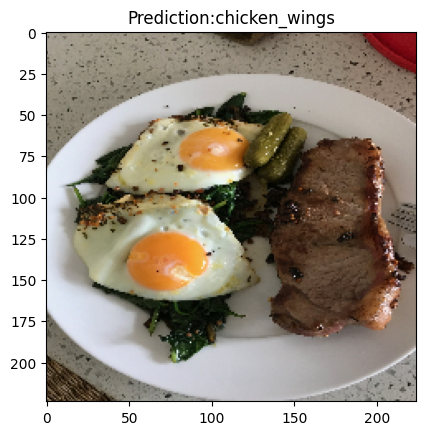

In [ ]:
pred_and_plot(model_7,"03-steak.jpeg")

In [ ]:
!wget https://www.tasteofhome.com/wp-content/uploads/2018/01/Homemade-Pizza_EXPS_FT23_376_EC_120123_3.jpg

In [ ]:
pred_and_plot(model_7,"pizza.jpg")

# Multiclass classification

In [ ]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
import zipfile
# unzip data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-01-14 00:51:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  18.1MB/s    in 28s     

2025-01-14 00:51:57 (17.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
 # walk through
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 10 directories and 0 images in 10_fo

In [ ]:
# setup train and test directory
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
# lets get the class name
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

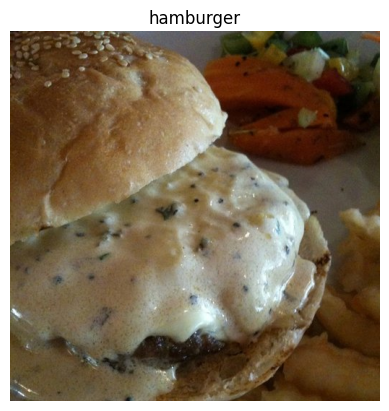

In [ ]:
img =view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

### Preprocessing

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
#preprocess data. get all the data between 0 and 1

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# import data from directories and turn into batches

train_data_multi=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",

                                             )

test_data_multi=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",

                                             )



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### create a model. a baseline

In [ ]:
# create a CNN with this baseline
model_8=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(1e-4),
                metrics=["accuracy"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_8_history=model_8.fit(train_data_multi,
                            epochs=5,
                        steps_per_epoch=len(train_data_multi),
                        validation_data=test_data_multi,
                        validation_steps=len(test_data_multi))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - accuracy: 0.1430 - loss: 2.2668 - val_accuracy: 0.2212 - val_loss: 2.1092
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.2433 - loss: 2.0699 - val_accuracy: 0.2604 - val_loss: 2.0373
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.2968 - loss: 1.9780 - val_accuracy: 0.3108 - val_loss: 1.9773


In [ ]:
# evaluate test data
model_8.evaluate(test_data_multi)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.2979 - loss: 2.0539


[2.059152603149414, 0.295199990272522]

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(model_history):
  # Extract data from the dictionary
  accuracy = model_history.history['accuracy']
  loss = model_history.history['loss']
  val_accuracy = model_history.history['val_accuracy']
  val_loss = model_history.history['val_loss']

  # Create subplots
  fig, axs = plt.subplots(2, 1, figsize=(10, 6))

  # Plot training and validation accuracy
  axs[0].plot(accuracy, label='Training Accuracy')
  axs[0].plot(val_accuracy, label='Validation Accuracy')
  axs[0].set_title('Training and Validation Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend()

  # Plot training and validation loss
  axs[1].plot(loss, label='Training Loss')
  axs[1].plot(val_loss, label='Validation Loss')
  axs[1].set_title('Training and Validation Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')
  axs[1].legend()

  plt.tight_layout()
  plt.show()

In [ ]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

**overfitting**

### adjust the hyperparameters to reduce overfitting
simplity the model

In [ ]:

model_9=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),

    MaxPool2D(),
    Conv2D(10,3,activation="relu"),

    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_9_history=model_9.fit(train_data_multi,
                            epochs=5,
                        steps_per_epoch=len(train_data_multi),
                        validation_data=test_data_multi,
                        validation_steps=len(test_data_multi))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - accuracy: 0.2086 - loss: 2.1930 - val_accuracy: 0.3276 - val_loss: 1.9161
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 130ms/step - accuracy: 0.4233 - loss: 1.7263 - val_accuracy: 0.3496 - val_loss: 1.8449
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step - accuracy: 0.5880 - loss: 1.3202 - val_accuracy: 0.3416 - val_loss: 1.9169


In [ ]:
model_9.evaluate(test_data_multi)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.3403 - loss: 1.9161


[1.9169361591339111, 0.3416000008583069]

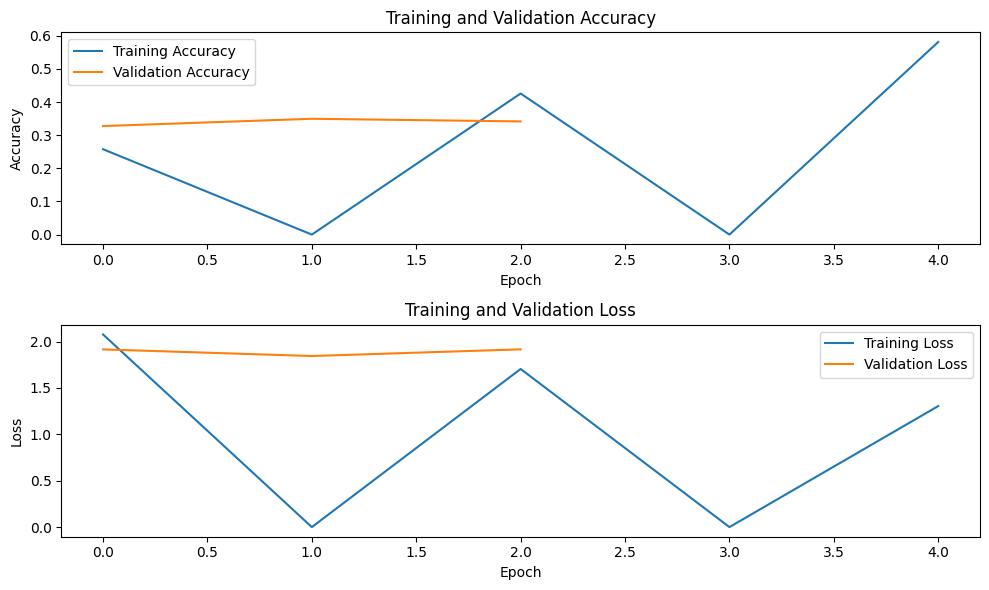

In [ ]:
plot_loss_curves(model_9_history)

In [ ]:
model_9.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

this didn't worked. lets try data augmentation
try to decrease overfitting by data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented_multi = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented_multi = train_datagen_augmented_multi.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


In [ ]:

model_10=tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_10_history=model_10.fit(train_data_augmented_multi,
                            epochs=5,
                        steps_per_epoch=len(train_data_augmented_multi),
                        validation_data=test_data_multi,
                        validation_steps=len(test_data_multi))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 110s 446ms/step - accuracy: 0.1613 - loss: 2.2458 - val_accuracy: 0.2588 - val_loss: 2.0520
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 436ms/step - accuracy: 0.2466 - loss: 2.1035 - val_accuracy: 0.3184 - val_loss: 1.9609
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 432ms/step - accuracy: 0.2847 - loss: 2.0368 - val_accuracy: 0.3448 - val_loss: 1.8834


In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  # import the target image and preprocess it
  img=load_image_and_prep(filename)
  expanded_img=tf.expand_dims(img,axis=0)
  # add logic for multiclass and get the pred class name
  pred=model.predict(expanded_img)
  print(pred)
  if len(pred[0])>1:
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")

In [ ]:
# making prediction with our trained model
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.15571143 0.42920667 0.01269571 0.18023956 0.03187907 0.01992925
  0.04671581 0.00623276 0.06430955 0.05308026]]


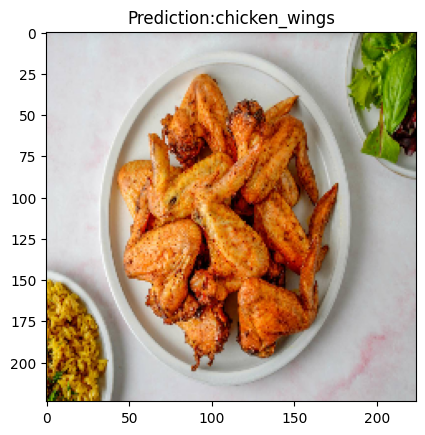

In [ ]:
pred_and_plot(model_10,"c-wings.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.03379108 0.07129893 0.04064664 0.08210714 0.06199372 0.11087885
  0.15794131 0.14187014 0.10712431 0.19234788]]


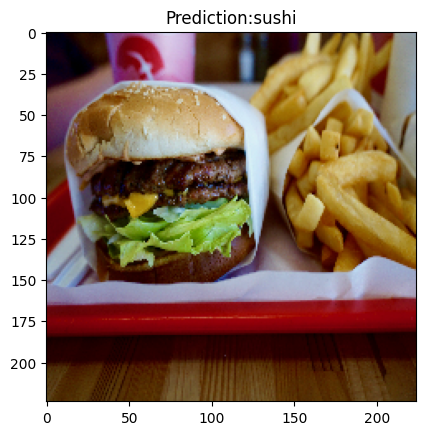

In [ ]:
pred_and_plot(model_10,"03-hamburger.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.10484792 0.22792499 0.03112612 0.10208599 0.09415776 0.02312536
  0.1426313  0.07691593 0.07179459 0.12538993]]


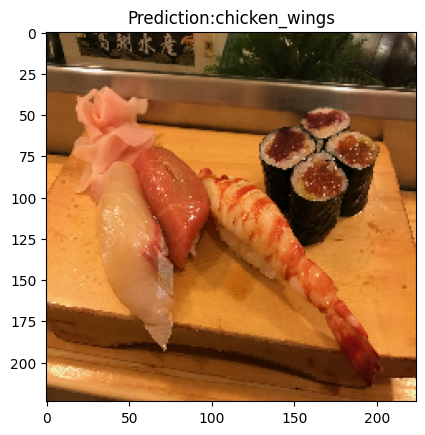

In [ ]:
pred_and_plot(model_10,"03-sushi.jpeg")

# save the model

In [ ]:
model_10.save("model_10_trained_food_vision.h5")

In [ ]:
# load model-10
loaded_model=tf.keras.models.load_model("model_10_trained_food_vision.h5")
loaded_model.evaluate(test_data_multi)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3328 - loss: 1.9012


[1.8834036588668823, 0.3447999954223633]